![logo](Data/ISJ.jpeg)

# MENTORED PROJECT of Masters II DATA Science

## Academic year 2022/2023

## Members:
- **DJEUNANG KENFACK Aude Michèle**
- **NZEUGANG NGOMSEU Romaric**

## Lecturer:
- **Dr. SIYOU Vanel**

# THEME

## Project 5 : **Predict the selling price of a house**

# MODELS NOTEBOOK

## House Price(Some of Regression Models)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
sample = pd.read_csv('Data/sample_submission.csv')

In [3]:
corr = train.corr()
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [4]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

We droped some columns that less than 0.3 of correlation of Sale Prices.

## Feature Engineering

We have to convert all columns into numeric or categorical data.

In [5]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


As we can see some of paremeters have a lot of missing values. That's why we should drop these from data. And we are going to drop parematers which total value is larger than 81.

In [6]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [7]:
train.isnull().sum().sort_values(ascending=False)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

**We are going to do same thing to the test data**

In [8]:
#missing data
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [9]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [10]:
# Checking for null in the test dataset
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [11]:
# Checking for null in the train dataset
train.isnull().sum().sort_values(ascending = False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

**we need to handle missing data. Excellent!!**

In [12]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

[]

In [13]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()
categorical_cols_test

[]

In [14]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [15]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [16]:
# Replacing NaN values with mean in train dataframe
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

Now we are going to pick some features for the model. For this we are going to use correlation matrix and we are going to pick most correlated with sale price.

In [17]:
# Saleprice correlation matrix
k = 15 #number of variables for heatmap
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [18]:
train = train[cols]
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [19]:
test=test[cols.drop('SalePrice')]
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [20]:
# Replacing NaN values with mean in test dataframe
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

# Machine Learning Models

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### Split Train Test

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=150)

In [22]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [23]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [24]:
X_train

array([[-0.80201873,  0.57032335, -1.03569158, ..., -0.67734063,
         0.60985466,  0.21585169],
       [-0.07278106, -0.00477846,  0.30755308, ...,  0.78164834,
         0.60985466,  0.61465558],
       [ 0.65645662, -0.54931008,  1.65079774, ...,  1.28187313,
        -0.96406317, -1.02181554],
       ...,
       [ 1.38569429,  0.16526825,  1.65079774, ...,  1.19850233,
         0.60985466, -1.02181554],
       [-0.80201873,  0.11368105,  0.30755308, ..., -2.0112734 ,
         0.60985466, -1.02181554],
       [-0.80201873, -1.2218544 , -1.03569158, ..., -0.42722824,
        -0.96406317,  0.1470924 ]])

## I - Linear Regression

In [25]:
# Initiating Linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [26]:
# print the intercept
print(lm.intercept_)
# print coefficient
print(lm.coef_)

[2.20511555e-16]
[[ 0.29898009  0.39075121  0.05050082  0.05108767  0.10275198  0.0113928
  -0.02167886 -0.03633291  0.06773776  0.09438792  0.04025422  0.02589117
   0.06226981  0.13581653]]


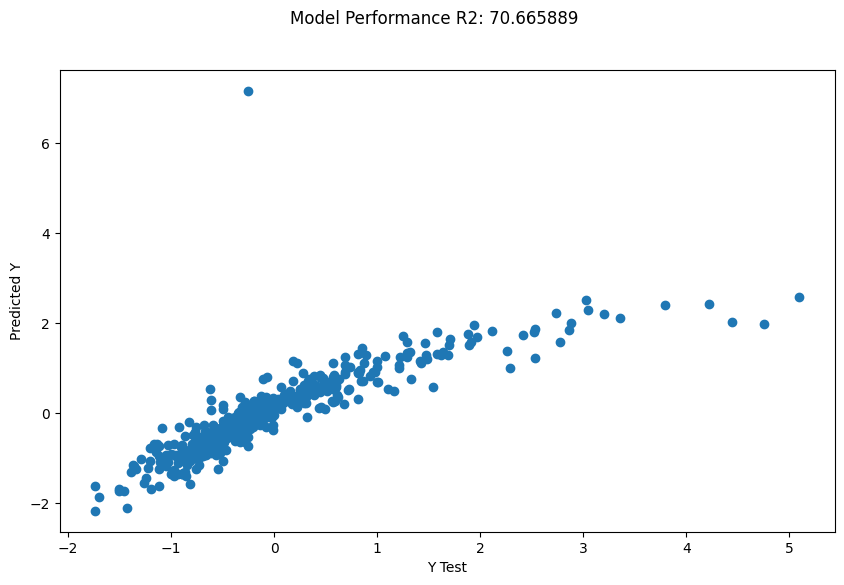

In [27]:
# Prediction from model and scatter plot to see the linearity between predicted values (predictions) and expected values y_test
predictions = lm.predict(X_test)
predictions = predictions.reshape(-1,1)
lm_score = r2_score(y_test, predictions)

plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (lm_score*100))
plt.show()

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2886745127158391
MSE: 0.29334110841677846
RMSE: 0.5416097381111038


## II - Gradient Boosting Regression

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. We are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices.

In [29]:
# Initiating Gradient boosting with params
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=4)

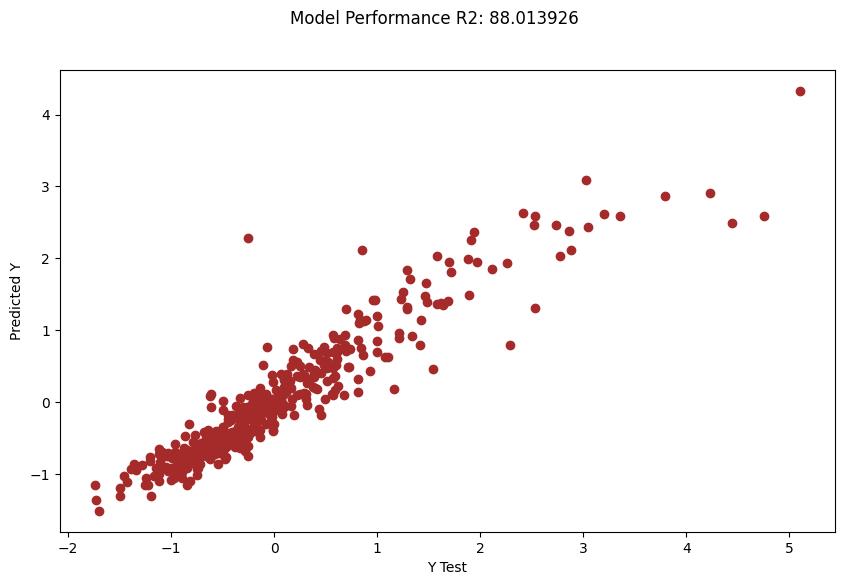

In [30]:
gbr_pred = gbr.predict(X_test)
gbr_pred = gbr_pred.reshape(-1,1)
gbr_score = r2_score(y_test, gbr_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,gbr_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (gbr_score*100))
plt.show()

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

MAE: 0.22371923651291906
MSE: 0.1198607427603951
RMSE: 0.34620910265386595


## III - Decision Tree Regression

The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).

In [32]:
# Initiating Decision Tree Model
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

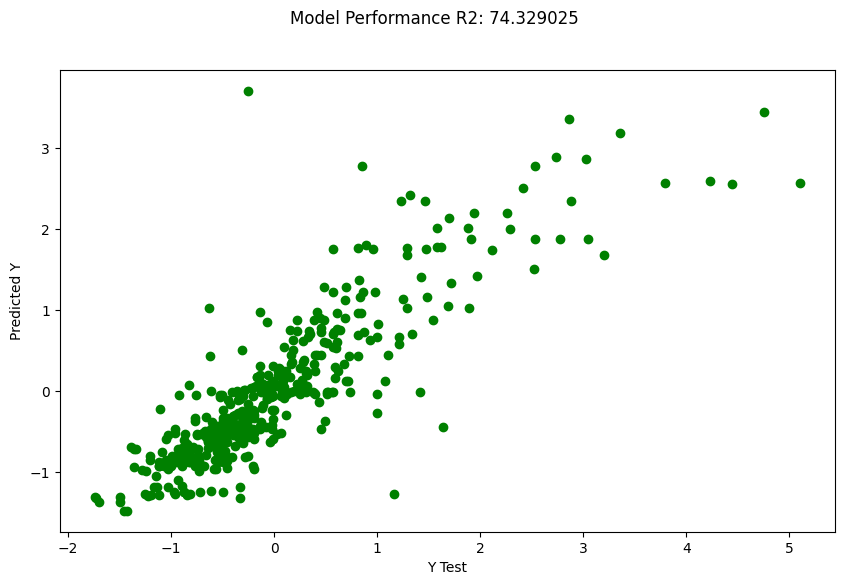

In [33]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)
dtr_score = r2_score(y_test, dtr_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (dtr_score*100))
plt.show()

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.325586395534542
MSE: 0.2567097520059806
RMSE: 0.5066653254427232


## IV - Support Vector Machine Regression

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.

In [35]:
# Initiating SVM model
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

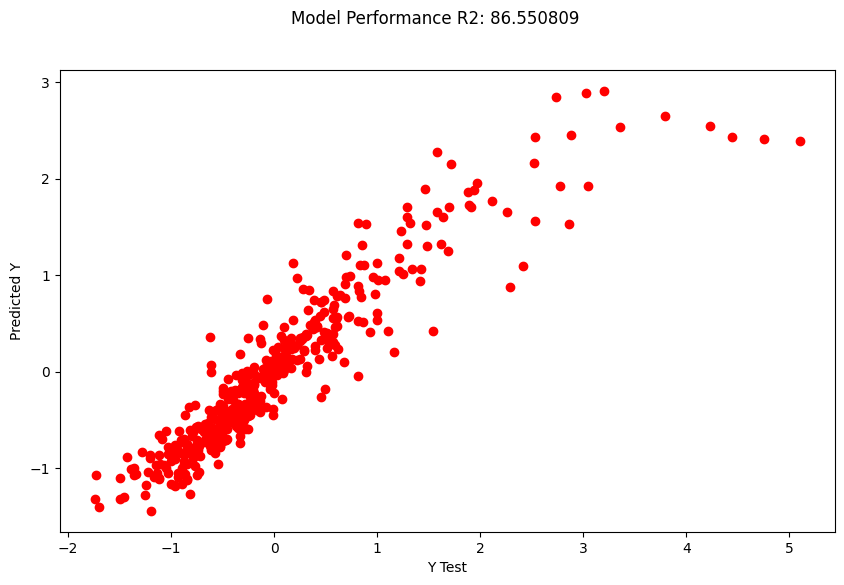

In [36]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)
svr_score = r2_score(y_test, svr_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (svr_score*100))
plt.show()

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.2265025243876864
MSE: 0.1344919053945433
RMSE: 0.3667313804333402


## V - Random Forest Regression

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

In [38]:
# Initiating random Forest regression model
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

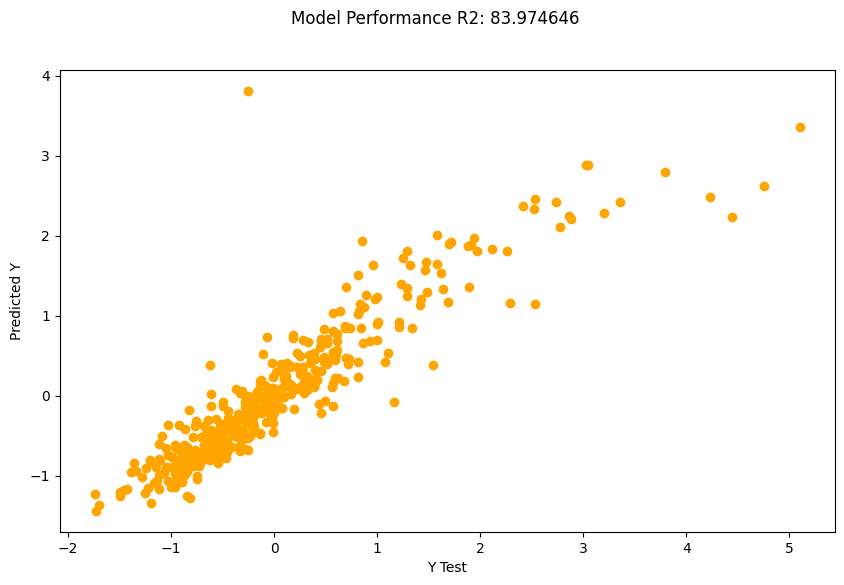

In [39]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)
rfr_score = r2_score(y_test, rfr_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (rfr_score*100))
plt.show()

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.23831592867695503
MSE: 0.16025353660290573
RMSE: 0.40031679530455094


## VI - LightGBM

In [41]:
# Initiating LightGBM regression model
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

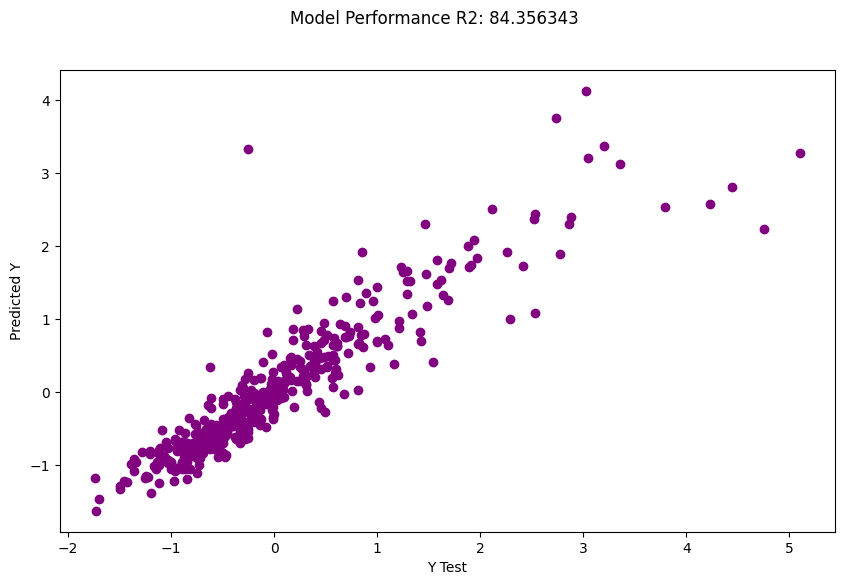

In [42]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)
lgb_score = r2_score(y_test, lgb_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,lgb_pred, c='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (lgb_score*100))
plt.show()

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.2385513459630557
MSE: 0.15643657192801258
RMSE: 0.3955206340104301


## VII - XGBoost Regressor

In [44]:
# Initiating XGboost model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

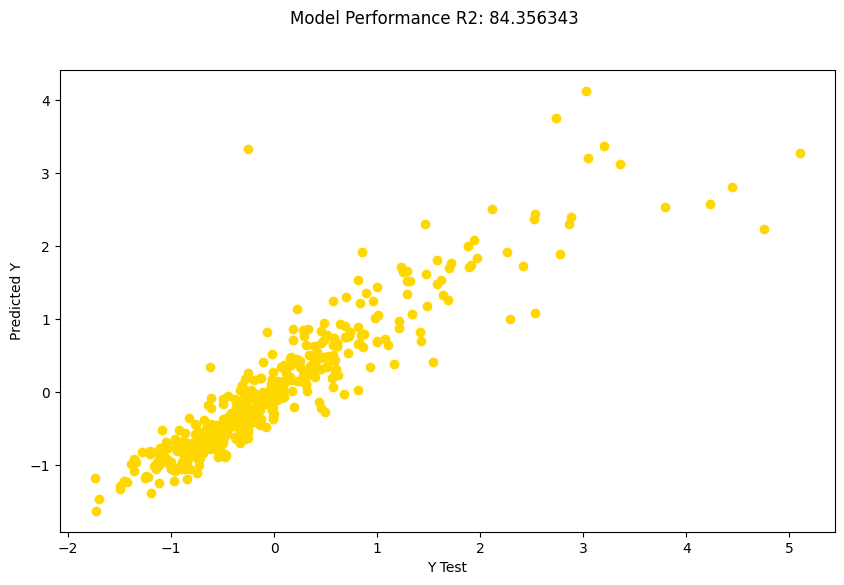

In [45]:
xgb_pred = model_lgb.predict(X_test)
xgb_pred = xgb_pred.reshape(-1,1)
xgb_score = r2_score(y_test, xgb_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,xgb_pred, c='gold')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (xgb_score*100))
plt.show()

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

MAE: 0.2385513459630557
MSE: 0.15643657192801258
RMSE: 0.3955206340104301


## VIII - Ridge Regression

In [47]:
# Initiating Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

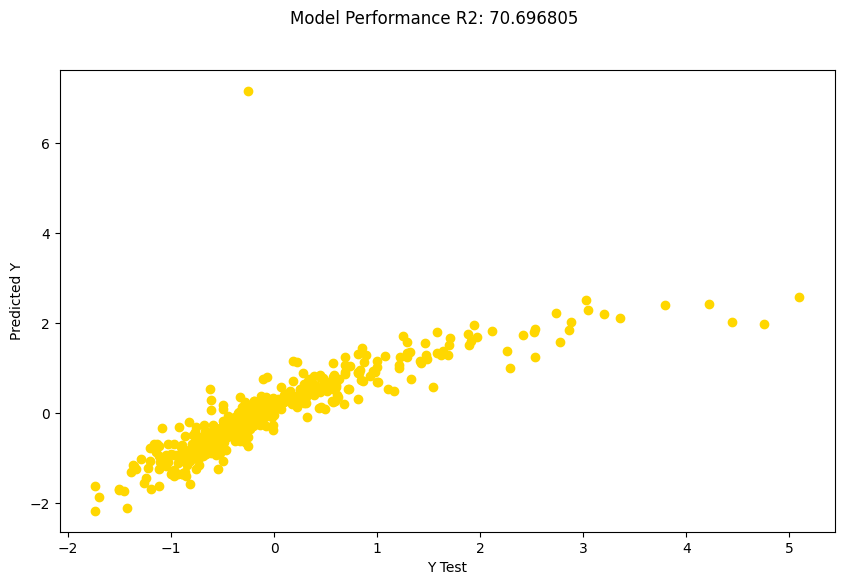

In [48]:
ridge_pred = ridge.predict(X_test)
ridge_pred = ridge_pred.reshape(-1,1)
ridge_score = r2_score(y_test, ridge_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,ridge_pred, c='gold')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (ridge_score*100))
plt.show()

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

MAE: 0.28856615376982087
MSE: 0.29303194607733996
RMSE: 0.541324252253065


## IX - Elastic Net

In [50]:
# Initiating Elastic net Regression model
eln = ElasticNet()
eln.fit(X_train, y_train)

ElasticNet()

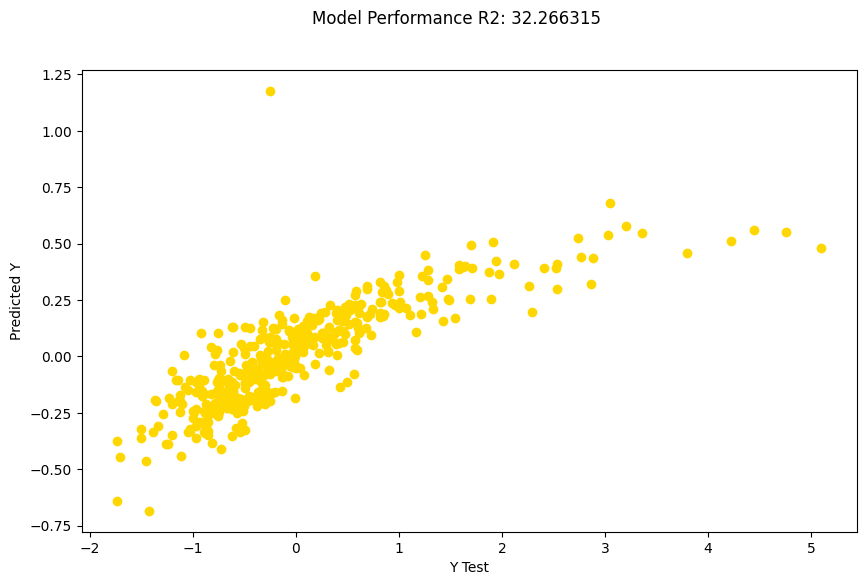

In [51]:
eln_pred = eln.predict(X_test)
eln_pred = eln_pred.reshape(-1,1)
eln_score = r2_score(y_test, eln_pred)

plt.figure(figsize=(10,6))
plt.scatter(y_test,eln_pred, c='gold')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.suptitle("Model Performance R2: %f" % (eln_score*100))
plt.show()

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, eln_pred))
print('MSE:', metrics.mean_squared_error(y_test, eln_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, eln_pred)))

MAE: 0.5658569248492071
MSE: 0.6773368502447222
RMSE: 0.8230047692721606


## Model Comparison

The less the Root Mean Squared Error (RMSE) or the Higher the R2 score, The better the model is.

In [53]:
models_selection = pd.DataFrame({
    'Model' : ['Linear Regression', 'Gradient Boosting Regression', 'Decision Tree Regressor', 'Support Vector Machine Regression', 'Random Forest Regressor', 'LightGBM', 'XgBoost Regressor', 'Ridge Regression', 'Elastic Net'],
    'Score' : [lm_score*100, gbr_score*100, dtr_score*100, svr_score*100, rfr_score*100, lgb_score*100, xgb_score*100, ridge_score*100, eln_score*100]
})
models_selection.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Gradient Boosting Regression,88.013926
3,Support Vector Machine Regression,86.550809
5,LightGBM,84.356343
6,XgBoost Regressor,84.356343
4,Random Forest Regressor,83.974646
2,Decision Tree Regressor,74.329025
7,Ridge Regression,70.696805
0,Linear Regression,70.665889
8,Elastic Net,32.266315


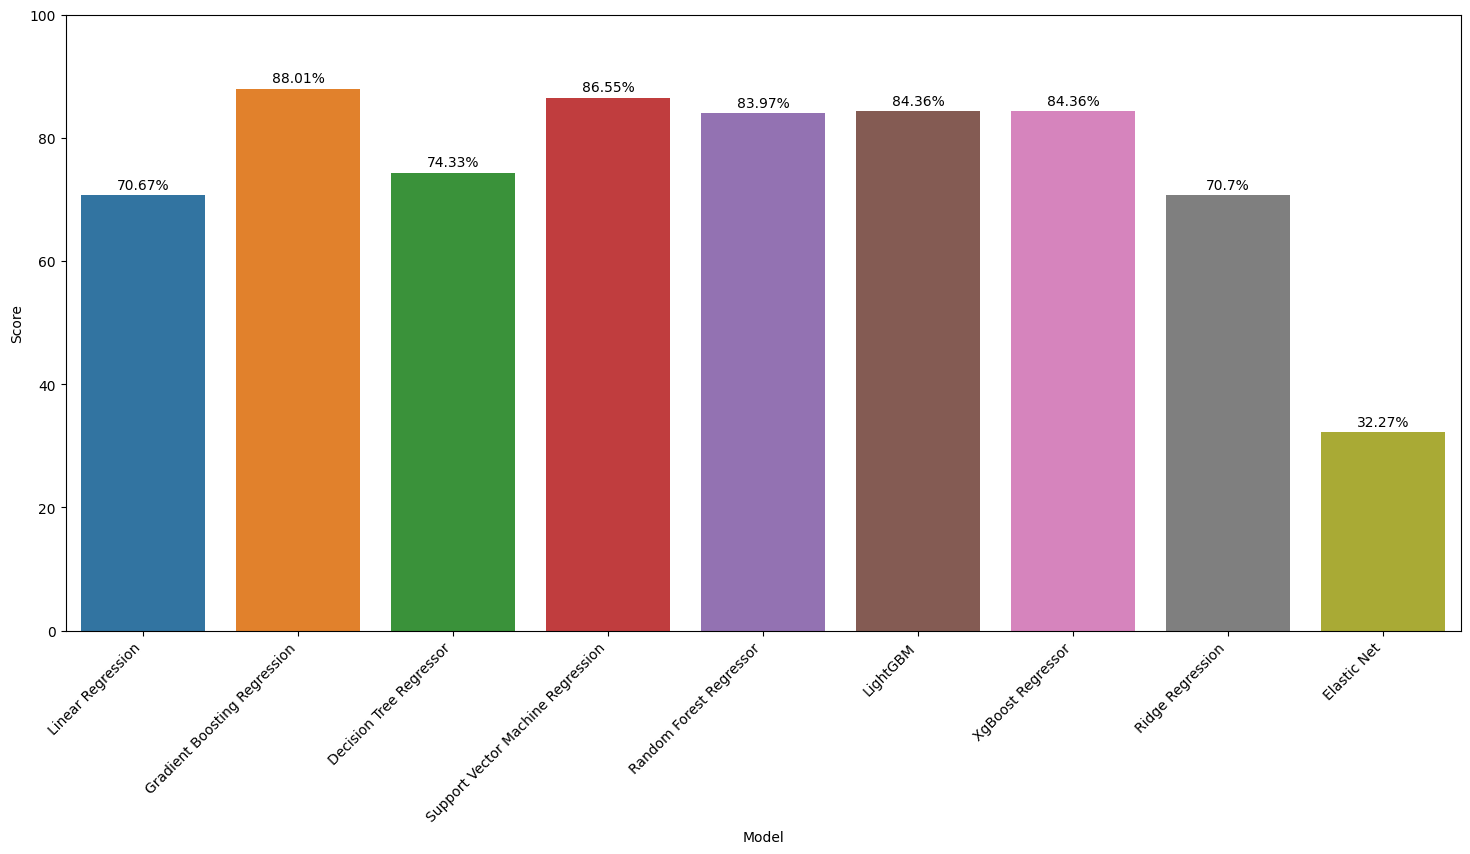

In [54]:
plt.figure(figsize = (18, 8))

ax = sns.barplot(x = 'Model', y = 'Score', data = models_selection)
plt.ylim(0, 100)

# Add percentage labels
for i in range(len(models_selection)):
    plt.annotate(str(round(models_selection['Score'][i], 2)) + '%', 
                 xy=(i, models_selection['Score'][i] + 1),
                 ha='center')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model which is what we did and had the following accuracies.

So, our best prediction model is **Gradient Boosting Regression**

**Now we will use test data.**

In [55]:
a = pd.read_csv('Data/test.csv')

In [56]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [57]:
test = sc_X.fit_transform(test)

In [58]:
test.shape

(1459, 14)

In [59]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

In [60]:
test_prediction_lgbm

array([[-0.7340057 ],
       [-0.48692726],
       [ 0.12213011],
       ...,
       [ 0.0482174 ],
       [-0.75632143],
       [ 0.76060907]])

In [61]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [62]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [63]:
test_prediction_lgbm.head()

,SalePrice
0,119601.500262
1,140449.452373
2,191840.413835
3,187113.060304
4,184050.736145


In [64]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [65]:
result.head()

,Id,SalePrice
0,1461,119601.500262
1,1462,140449.452373
2,1463,191840.413835
3,1464,187113.060304
4,1465,184050.736145


In [66]:
result.to_csv('Data/submission.csv',index=False)